In [ ]:
import os
import numpy as np
import pandas as pd
from zipfile import ZipFile
from google.colab import files
import re

# 1. Télécharger le fichier ZIP dans Colab
uploaded = files.upload()  # Cela ouvrira un dialogue pour télécharger le fichier

# 2. Extraire les fichiers du ZIP dans le répertoire de travail
for filename in uploaded.keys():
    with ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()  # Extraire dans le répertoire courant

# Définir le répertoire de base où les données sont extraites
base_dir = './EEG_data'  # Mettez à jour ceci si nécessaire selon la structure de votre zip

def read_raw_values(file_path):
    """Lire et retourner les valeurs d'un fichier texte sans calculer la moyenne."""
    with open(file_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
    return values

# Initialiser la liste pour stocker les données des patients
patient_data_list = []

# Définir les caractéristiques
features = ['C3.txt', 'C4.txt', 'Cz.txt', 'F1.txt', 'F2.txt', 'F3.txt', 'F4.txt',
            'F7.txt', 'F8.txt', 'Fp1.txt', 'Fp2.txt', 'Fz.txt', 'O1.txt',
            'O2.txt', 'P3.txt', 'P4.txt', 'Pz.txt', 'T3.txt', 'T4.txt',
            'T5.txt', 'T6.txt']

# Boucle à travers les répertoires des patients selon les conditions et les états des yeux
for condition in ['AD', 'Healthy']:  # Classes de patients
    condition_path = os.path.join(base_dir, condition)
    id_offset = 80 if condition == 'AD' else 0  # Ajuste l'identifiant en fonction de la condition

    for eye_state in ['Eyes_closed', 'Eyes_open']:  # États des yeux
        eye_state_path = os.path.join(condition_path, eye_state)
        eye_state_flag = eye_state == 'Eyes_open'

        # Vérifiez si le chemin de l'état des yeux existe avant de continuer
        if os.path.exists(eye_state_path):
            for patient_folder in os.listdir(eye_state_path):
                patient_path = os.path.join(eye_state_path, patient_folder)
                if os.path.isdir(patient_path):  # Assurez-vous que c'est un répertoire
                    print(f'Processing data for {patient_folder} in {eye_state} ({condition})')
                    patient_number = id_offset + int(re.findall(r'\d+', patient_folder)[0])  # Numéro du patient

                    # Dictionnaire pour stocker les valeurs brutes pour chaque patient
                    patient_data = {'patient': patient_number, 'eye_state': eye_state_flag, 'label': condition}

                    # Lire les fichiers de données pour chaque patient
                    for feature_file in features:
                        file_path = os.path.join(patient_path, feature_file)
                        if os.path.exists(file_path):
                            raw_values = read_raw_values(file_path)  # Appeler la fonction pour obtenir les valeurs brutes
                            patient_data[feature_file.replace('.txt', '')] = raw_values  # Stocker les valeurs brutes
                        else:
                            print(f"{feature_file} is missing for {patient_folder}")
                            patient_data[feature_file.replace('.txt', '')] = None  # Gérer le fichier manquant

                    patient_data_list.append(patient_data)
        else:
            print(f"Path does not exist: {eye_state_path}")

# Convertir la liste en un DataFrame pour une manipulation ultérieure
df = pd.DataFrame(patient_data_list)

# Afficher le DataFrame final avec des caractéristiques pour chaque patient
print(df)


Saving EEG_data (2).zip to EEG_data (2).zip
Processing data for Paciente54 in Eyes_closed (AD)
Processing data for Paciente27 in Eyes_closed (AD)
Processing data for Paciente34 in Eyes_closed (AD)
Processing data for Paciente13 in Eyes_closed (AD)
Processing data for Paciente39 in Eyes_closed (AD)
Processing data for Paciente2 in Eyes_closed (AD)
Processing data for Paciente30 in Eyes_closed (AD)
Processing data for Paciente56 in Eyes_closed (AD)
Processing data for Paciente63 in Eyes_closed (AD)
Processing data for Paciente70 in Eyes_closed (AD)
Processing data for Paciente51 in Eyes_closed (AD)
Processing data for Paciente24 in Eyes_closed (AD)
Processing data for Paciente43 in Eyes_closed (AD)
Processing data for Paciente45 in Eyes_closed (AD)
Processing data for Paciente50 in Eyes_closed (AD)
Processing data for Paciente33 in Eyes_closed (AD)
Processing data for Paciente9 in Eyes_closed (AD)
Processing data for Paciente14 in Eyes_closed (AD)
Processing data for Paciente60 in Eyes_c

In [ ]:
df.to_csv("EGG_Dataset.csv",index=False)

NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv("EGG_Dataset.csv")

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
print(df)

     patient  eye_state  label        C3        C4        Cz        F1  \
0         65          0      0  0.282070  0.021628  0.300120  0.384879   
1         38          0      0  0.203382 -0.045327  0.227018  0.063826   
2         45          0      0  0.348708  0.036706  0.338493  0.542854   
3         24          0      0  0.079722  0.141927  0.191456  0.133153   
4         50          0      0  0.253374 -0.046498  0.049998  0.390390   
..       ...        ...    ...       ...       ...       ...       ...   
170        4          0      1  0.812193  0.980273  0.885748  0.585931   
163        0          0      1  3.329001  3.217478  3.127604  4.261092   
172        1          1      1  1.854941  1.906537  1.595286  4.101562   
166        6          0      1 -0.043303 -0.015981  0.048133  0.075647   
178        6          1      1 -0.304037 -0.114117 -0.162739 -0.145532   

           F2        F3        F4  ...        Fz        O1        O2  \
0    0.352140  0.154290  0.258533  ... 

In [ ]:
df.describe()


,patient,C3,C4,Cz,F1,F2,F3,F4,F7,F8,...,Fz,O1,O2,P3,P4,Pz,T3,T4,T5,T6
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,105.630435,0.289483,0.158149,0.290054,0.361590,0.321234,0.236121,0.276024,0.307924,0.349686,...,0.319678,0.288321,0.290736,0.280241,0.281480,0.189043,0.330842,0.277878,0.331079,0.297358
std,44.157373,0.406562,0.467433,0.390820,0.610606,0.578840,0.494632,0.457698,0.517237,0.497629,...,0.461788,0.379163,0.417102,0.394998,0.420062,0.431782,0.388964,0.405185,0.418504,0.408167
min,1.000000,-1.098395,-1.170145,-1.024435,-1.333613,-1.130633,-1.361456,-1.032489,-1.409572,-1.328169,...,-0.879849,-1.405073,-1.458380,-1.395041,-1.189334,-1.266319,-1.154662,-1.221391,-1.217338,-1.237745
25%,91.750000,0.145822,-0.045620,0.124563,0.113992,0.124335,0.062736,0.124663,0.126589,0.178673,...,0.142177,0.145091,0.149197,0.135527,0.114032,0.022271,0.190328,0.152603,0.171699,0.157700
50%,114.500000,0.217150,0.051397,0.220380,0.249265,0.236639,0.157305,0.200035,0.218938,0.286020,...,0.229079,0.237764,0.228283,0.226251,0.199399,0.131234,0.265356,0.214793,0.248953,0.236316
75%,137.250000,0.283457,0.199278,0.315136,0.410239,0.402349,0.265337,0.299808,0.313759,0.416666,...,0.336811,0.327261,0.330152,0.294477,0.293565,0.222775,0.346500,0.285689,0.317985,0.297924
max,160.000000,3.329001,3.217478,3.127604,4.261092,4.090878,4.103266,3.715897,4.638426,3.790838,...,3.834432,2.922371,3.010765,2.952371,3.046932,3.071024,3.184134,3.063760,2.998167,3.088336


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    184 non-null    int64  
 1   eye_state  184 non-null    bool   
 2   label      184 non-null    object 
 3   C3         184 non-null    float64
 4   C4         184 non-null    float64
 5   Cz         184 non-null    float64
 6   F1         184 non-null    float64
 7   F2         184 non-null    float64
 8   F3         184 non-null    float64
 9   F4         184 non-null    float64
 10  F7         184 non-null    float64
 11  F8         184 non-null    float64
 12  Fp1        184 non-null    float64
 13  Fp2        184 non-null    float64
 14  Fz         184 non-null    float64
 15  O1         184 non-null    float64
 16  O2         184 non-null    float64
 17  P3         184 non-null    float64
 18  P4         184 non-null    float64
 19  Pz         184 non-null    float64
 20  T3        

In [ ]:
ligne = df.loc[df['patient'] == 5]
print(ligne)

Empty DataFrame
Columns: [patient, eye_state, label, C3, C4, Cz, F1, F2, F3, F4, F7, F8, Fp1, Fp2, Fz, O1, O2, P3, P4, Pz, T3, T4, T5, T6]
Index: []

[0 rows x 24 columns]


In [ ]:
corr=df.corr()
print(corr)

            patient  eye_state     label        C3        C4        Cz  \
patient    1.000000   0.036286 -0.811277 -0.317035 -0.314663 -0.275939   
eye_state  0.036286   1.000000 -0.037526 -0.056039 -0.043972 -0.064063   
label     -0.811277  -0.037526  1.000000  0.359098  0.375647  0.321967   
C3        -0.317035  -0.056039  0.359098  1.000000  0.977461  0.984890   
C4        -0.314663  -0.043972  0.375647  0.977461  1.000000  0.979037   
Cz        -0.275939  -0.064063  0.321967  0.984890  0.979037  1.000000   
F1        -0.340564  -0.069253  0.413560  0.899021  0.877582  0.872142   
F2        -0.334644  -0.051770  0.388874  0.901190  0.873797  0.873398   
F3        -0.380214  -0.086540  0.411057  0.951000  0.906926  0.915997   
F4        -0.310349  -0.029969  0.342578  0.978089  0.968185  0.968581   
F7        -0.336408  -0.133984  0.386533  0.912332  0.884593  0.894233   
F8        -0.182822  -0.006855  0.199310  0.943062  0.943177  0.937766   
Fp1       -0.340281  -0.068983  0.4132

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['eye_state'] = label_encoder.fit_transform(df['eye_state'])
df['label'] = label_encoder.fit_transform(df[['label']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df['patient'] = label_encoder.fit_transform(df[['patient']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df['patient'].value_counts()

,count
patient,
33,4
22,4
77,4
55,4
0,4
...,...
52,2
51,2
38,2


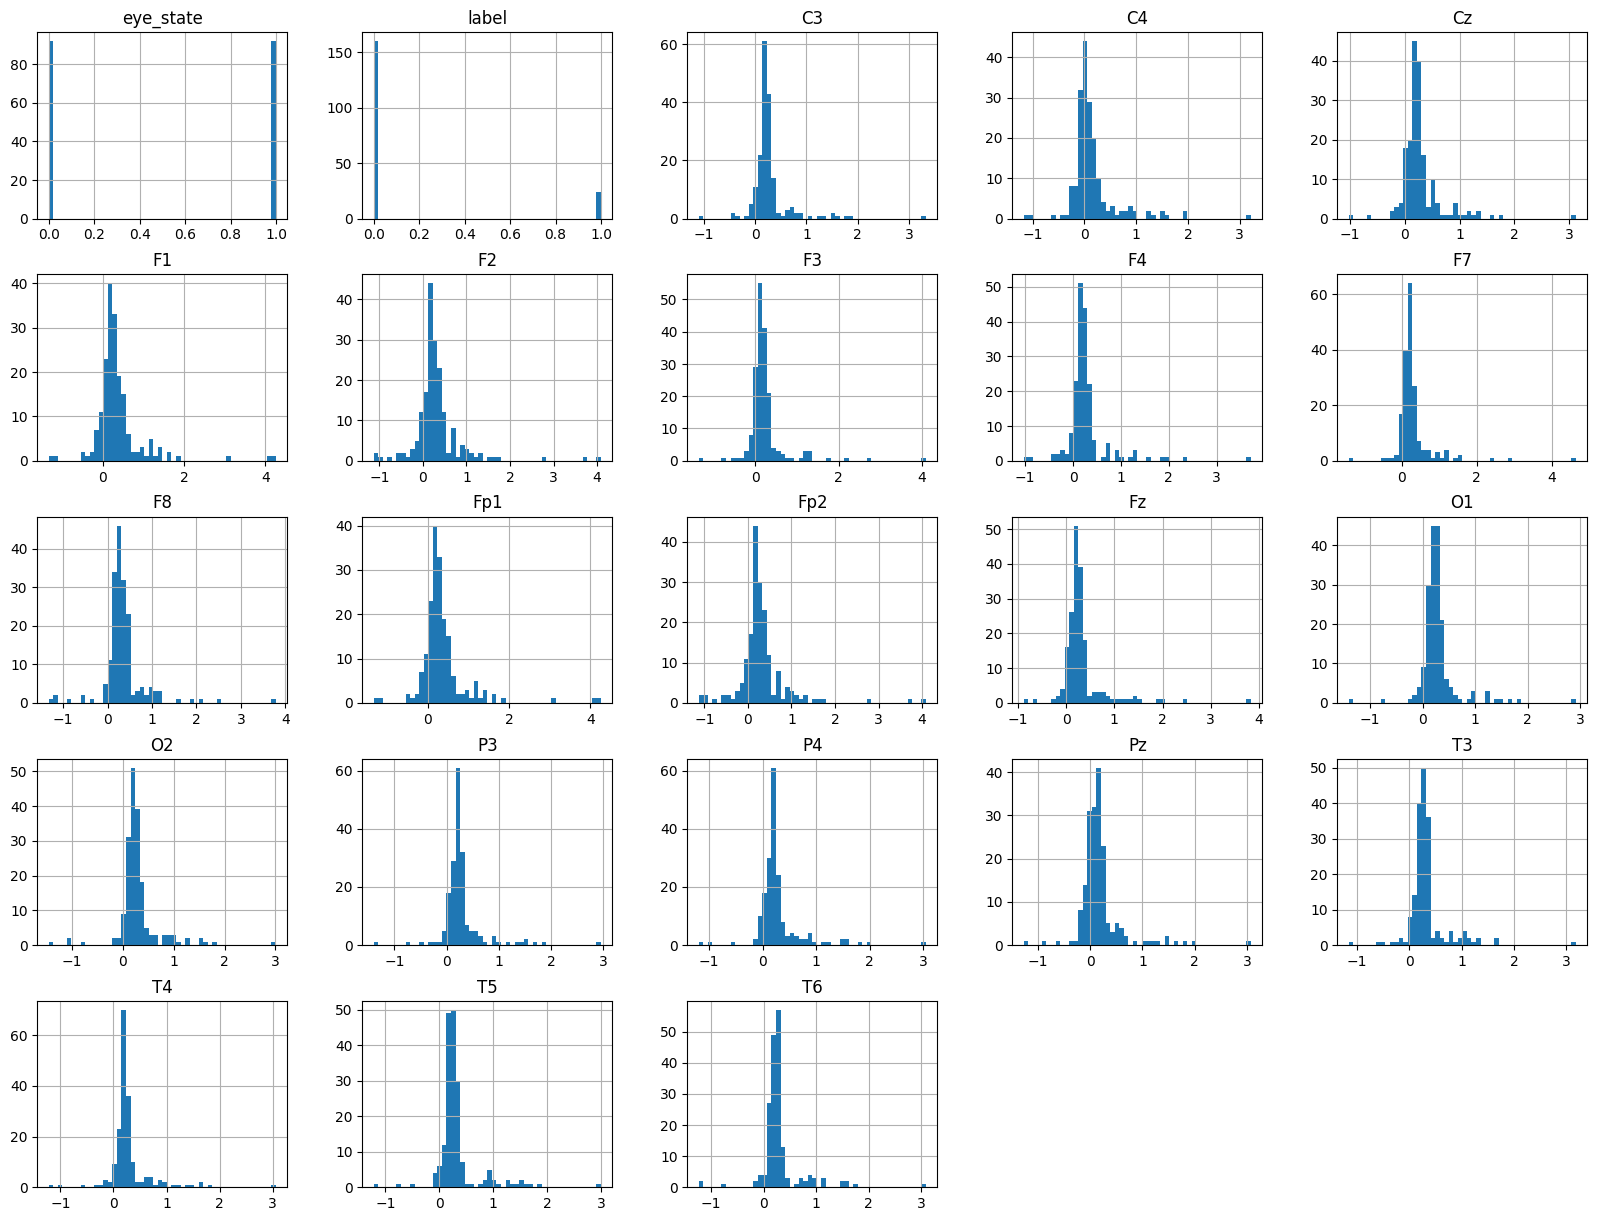

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='patient', ylabel='patient'>,
        <Axes: xlabel='eye_state', ylabel='patient'>,
        <Axes: xlabel='label', ylabel='patient'>,
        <Axes: xlabel='C3', ylabel='patient'>,
        <Axes: xlabel='C4', ylabel='patient'>,
        <Axes: xlabel='Cz', ylabel='patient'>,
        <Axes: xlabel='F1', ylabel='patient'>,
        <Axes: xlabel='F2', ylabel='patient'>,
        <Axes: xlabel='F3', ylabel='patient'>,
        <Axes: xlabel='F4', ylabel='patient'>,
        <Axes: xlabel='F7', ylabel='patient'>,
        <Axes: xlabel='F8', ylabel='patient'>,
        <Axes: xlabel='Fp1', ylabel='patient'>,
        <Axes: xlabel='Fp2', ylabel='patient'>,
        <Axes: xlabel='Fz', ylabel='patient'>,
        <Axes: xlabel='O1', ylabel='patient'>,
        <Axes: xlabel='O2', ylabel='patient'>,
        <Axes: xlabel='P3', ylabel='patient'>,
        <Axes: xlabel='P4', ylabel='patient'>,
        <Axes: xlabel='Pz', ylabel='patient'>,
        <Axes: xlabel='T3', ylabel='patient

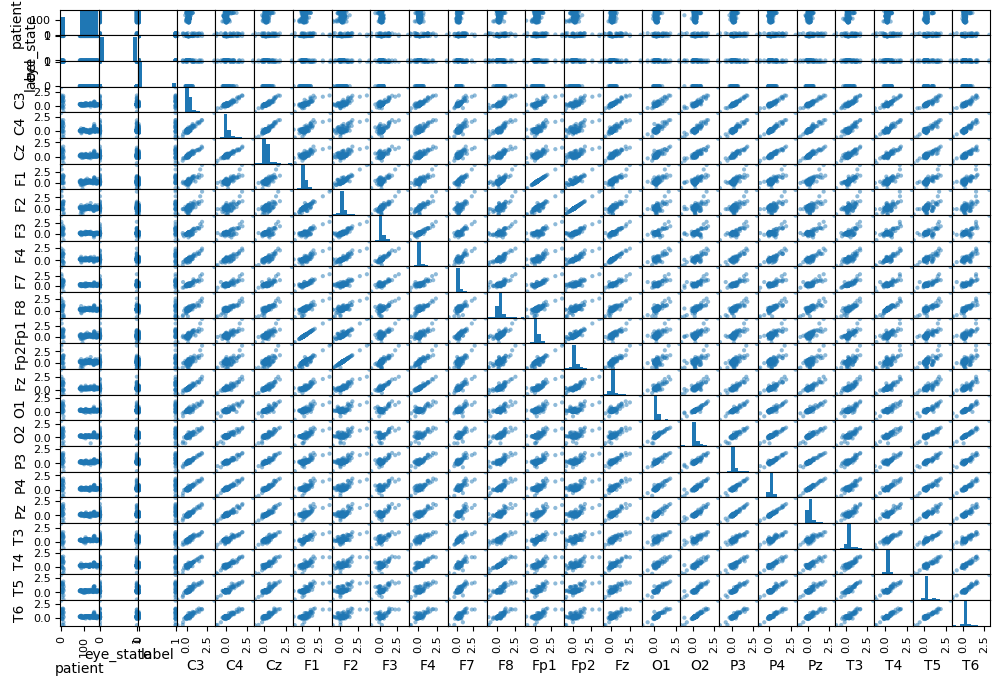

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12, 8))

Random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assurons-nous que votre DataFrame df contient une colonne 'label' pour les étiquettes
# et toutes les autres colonnes sont des caractéristiques numériques

# 1. Charger ou préparer votre DataFrame (df)
# df = pd.DataFrame(...)  # Déjà créé précédemment

# 2. Séparer les caractéristiques (X) et les étiquettes (y)
X = df.drop(columns=['patient', 'label'])  # Supprimer les colonnes non nécessaires
y = df['label']

# 3. Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Créer le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Entraîner le modèle
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

# 6. Faire des prédictions
y_pred = model.predict(X_test)
# 7. Évaluer le training
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f'Accuracy Train: {accuracy_train:.2f}')
print('Classification Report for train:')
print(report_train)
# 7. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy Train: 1.00
Classification Report for train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       114

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        46

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



desiccion  tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Charger ou préparer votre DataFrame (df)
# df = pd.DataFrame(...)  # Déjà créé précédemment

# 2. Séparer les caractéristiques (X) et les étiquettes (y)
X = df.drop(columns=['patient', 'label'])  # Supprimer les colonnes non nécessaires
y = df['label']

# 3. Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Créer le modèle Decision Tree
model = DecisionTreeClassifier(random_state=42)

# 5. Entraîner le modèle
model.fit(X_train, y_train)

# 6. Faire des prédictions
y_pred = model.predict(X_test)

# 7. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [ ]:
svm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Importation du modèle SVM
from sklearn.metrics import accuracy_score, classification_report

# 1. Charger ou préparer votre DataFrame (df)
# df = pd.DataFrame(...)  # Déjà créé précédemment

# 2. Séparer les caractéristiques (X) et les étiquettes (y)
X = df.drop(columns=['patient', 'label'])  # Supprimer les colonnes non nécessaires
y = df['label']

# 3. Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Créer le modèle SVM
model = SVC(kernel='linear', random_state=42)  # Utilisation de SVC au lieu de SVM

# 5. Entraîner le modèle
model.fit(X_train, y_train)

# 6. Faire des prédictions
y_pred = model.predict(X_test)

# 7. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.89      0.78      0.83        32

    accuracy                           0.84        64
   macro avg       0.85      0.84      0.84        64
weighted avg       0.85      0.84      0.84        64



KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Importation du modèle KNN
from sklearn.metrics import accuracy_score, classification_report

# 1. Charger ou préparer votre DataFrame (df)
# df = pd.DataFrame(...)  # Déjà créé précédemment

# 2. Séparer les caractéristiques (X) et les étiquettes (y)
X = df.drop(columns=['patient', 'label'])  # Supprimer les colonnes non nécessaires
y = df['label']

# 3. Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Créer le modèle KNN
model = KNeighborsClassifier(n_neighbors=5)  # Utilisation de K=5 voisins, mais cela peut être ajusté

# 5. Entraîner le modèle
model.fit(X_train, y_train)

# 6. Faire des prédictions
y_pred = model.predict(X_test)

# 7. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



Auto encoder


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

# Supposons que df est déjà chargé et contient vos données
# Sélectionner uniquement les colonnes avec des valeurs numériques
data_features = df.drop(columns=['patient', 'label'])  # Supprimer les colonnes non numériques
y = df['label']
# Séparer les données en ensemble d'entraînement et ensemble de test
X_train, X_test,y_train,y_test = train_test_split(data_features,y, test_size=0.2, random_state=42)

# Définir la taille d'entrée
input_size = X_train.shape[1]  # Nombre de caractéristiques
input_size

22

In [ ]:

input_layer = Input(shape=(input_size,))
encoded = Dense(11, activation='relu')(input_layer)
encoded = Dense(5, activation='relu')(encoded) # Couche encodage
decoded = Dense(5, activation='sigmoid')(encoded)
decoded = Dense(11, activation='sigmoid')(decoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)  # Couche décodage

# Créer le modèle
autoencoder = Model(input_layer, decoded)
encoder=Model(input_layer,encoded)

# Compiler le modèle
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner l'autoencodeur
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2)

# Prédire les données de test
X_test_predicted = autoencoder.predict(X_test)

# Calculer l'erreur quadratique moyenne
mse = np.mean(np.power(X_test - X_test_predicted, 2), axis=1)
print(f'Mean Squared Error on test data: {np.mean(mse)}')


NameError: name 'Input' is not defined

In [ ]:
# Assuming 'patient' and 'label' are the extra columns
df_for_prediction = df.drop(columns=['patient', 'label'])

# Now predict using the modified DataFrame
X_train_encoder = encoder.predict(X_train)
X_test_encoder = encoder.predict(X_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


RandomForest for auto encodeur

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Entraîner le modèle
model.fit(X_train_encoder, y_train)
y_pred_train = model.predict(X_train_encoder)

# 6. Faire des prédictions
y_pred = model.predict(X_test_encoder)
# 7. Évaluer le training
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f'Accuracy Train: {accuracy_train:.2f}')
print('Classification Report for train:')
print(report_train)
# 7. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy Train: 1.00
Classification Report for train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        19

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         5

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



SVM  for  auro  encoder


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Créer le modèle SVM
model = SVC(kernel='linear', random_state=42)  # Vous pouvez ajuster le kernel ('linear', 'rbf', 'poly', etc.)

# 2. Entraîner le modèle
model.fit(X_train_encoder, y_train)
y_pred_train = model.predict(X_train_encoder)

# 3. Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_encoder)

# 4. Évaluer les performances sur l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f'Accuracy Train: {accuracy_train:.2f}')
print('Classification Report for train:')
print(report_train)

# 5. Évaluer les performances sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy Train: 0.95
Classification Report for train:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       128
           1       1.00      0.63      0.77        19

    accuracy                           0.95       147
   macro avg       0.97      0.82      0.87       147
weighted avg       0.95      0.95      0.95       147

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.80      0.89         5

    accuracy                           0.97        37
   macro avg       0.98      0.90      0.94        37
weighted avg       0.97      0.97      0.97        37



KNN for auto  encoder

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Créer le modèle KNN
model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (k)

# 2. Entraîner le modèle
model.fit(X_train_encoder, y_train)
y_pred_train = model.predict(X_train_encoder)

# 3. Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_encoder)

# 4. Évaluer les performances sur l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f'Accuracy Train: {accuracy_train:.2f}')
print('Classification Report for train:')
print(report_train)

# 5. Évaluer les performances sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy Train: 0.96
Classification Report for train:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       128
           1       1.00      0.68      0.81        19

    accuracy                           0.96       147
   macro avg       0.98      0.84      0.89       147
weighted avg       0.96      0.96      0.96       147

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.80      0.89         5

    accuracy                           0.97        37
   macro avg       0.98      0.90      0.94        37
weighted avg       0.97      0.97      0.97        37



Decision Tree   for auto  encoder

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Créer le modèle Decision Tree
model = DecisionTreeClassifier(random_state=42)  # Vous pouvez ajuster des paramètres comme 'max_depth'

# 2. Entraîner le modèle
model.fit(X_train_encoder, y_train)
y_pred_train = model.predict(X_train_encoder)

# 3. Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_encoder)

# 4. Évaluer les performances sur l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f'Accuracy Train: {accuracy_train:.2f}')
print('Classification Report for train:')
print(report_train)

# 5. Évaluer les performances sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy Train: 1.00
Classification Report for train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        19

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         5

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



Auto-encodeur de débruitage

In [ ]:
# Ajout de bruit
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy_data, 0., 1.)

X_train_noisy = add_noise(X_train)
X_test_noisy = add_noise(X_test)

# Construction de l'auto-encodeur de débruitage
input_data = Input(shape=(input_size,))
encoded = Dense(11, activation='relu')(input_data)
decoded = Dense(input_size, activation='sigmoid')(encoded)

denoising_autoencoder = Model(input_data, decoded)
encoder_denoising = Model(input_data, encoded)  # Pour encoder les données

# Compilation et entraînement
denoising_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
denoising_autoencoder.fit(X_train_noisy, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_noisy, X_test))

# Encoder les données bruitées
X_train_encoded = encoder_denoising.predict(X_train_noisy)
X_test_encoded= encoder_denoising.predict(X_test_noisy)



Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.6594 - val_loss: 0.6297
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7169 - val_loss: 0.6212
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6483 - val_loss: 0.6135
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7279 - val_loss: 0.6059
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7528 - val_loss: 0.5986
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6523 - val_loss: 0.5916
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6823 - val_loss: 0.5842
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5474 - val_loss: 0.5767
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7014 - val_loss: 0.5681
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6099 - val_loss: 0.5596
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6995 - val_loss: 0.5498
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5707 - val_loss: 0.5400
Epoch 13/5

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


SVM  for  Auto-encodeur de débruitage

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM avec noyau linéaire
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_encoded, y_train)
y_pred_train_svm = svm_model.predict(X_train_encoded)
y_pred_svm = svm_model.predict(X_test_encoded)

# Évaluation
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
report_train_svm = classification_report(y_train, y_pred_train_svm)
print(f'SVM Accuracy Train: {accuracy_train_svm:.2f}')
print(report_train_svm)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print(f'SVM Accuracy Test: {accuracy_svm:.2f}')
print(report_svm)


SVM Accuracy Train: 0.80
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       128
           1       0.95      0.63      0.76       128

    accuracy                           0.80       256
   macro avg       0.84      0.80      0.79       256
weighted avg       0.84      0.80      0.79       256

SVM Accuracy Test: 0.81
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        32
           1       1.00      0.62      0.77        32

    accuracy                           0.81        64
   macro avg       0.86      0.81      0.81        64
weighted avg       0.86      0.81      0.81        64



KNN for Auto-encodeur de débruitage

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_encoded, y_train)
y_pred_train_knn = knn_model.predict(X_train_encoded)
y_pred_knn = knn_model.predict(X_test_encoded)

# Évaluation
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
report_train_knn = classification_report(y_train, y_pred_train_knn)
print(f'KNN Accuracy Train: {accuracy_train_knn:.2f}')
print(report_train_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print(f'KNN Accuracy Test: {accuracy_knn:.2f}')
print(report_knn)


KNN Accuracy Train: 0.95
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       128
           1       0.91      0.98      0.95       128

    accuracy                           0.95       256
   macro avg       0.95      0.95      0.95       256
weighted avg       0.95      0.95      0.95       256

KNN Accuracy Test: 0.97
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.97      0.97      0.97        32

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



Decision Tree  for  Auto-encodeur de débruitage

In [ ]:
print("\nDecision Tree Model:")
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_encoded, y_train)

y_pred_train_tree = tree_model.predict(X_train_encoded)
y_pred_tree = tree_model.predict(X_test_encoded)

accuracy_train_tree = accuracy_score(y_train, y_pred_train_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'Accuracy Train: {accuracy_train_tree:.2f}')
print(f'Accuracy Test: {accuracy_tree:.2f}')
print('Classification Report (Test):')
print(classification_report(y_test, y_pred_tree))


Decision Tree Model:
Accuracy Train: 1.00
Accuracy Test: 0.91
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.93      0.88      0.90        32

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



Random Forest   Auto-encodeur de débruitage

In [ ]:
print("\nRandom Forest Model:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

y_pred_train_rf = rf_model.predict(X_train_encoded)
y_pred_rf = rf_model.predict(X_test_encoded)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy Train: {accuracy_train_rf:.2f}')
print(f'Accuracy Test: {accuracy_rf:.2f}')
print('Classification Report (Test):')
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy Train: 1.00
Accuracy Test: 0.92
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.97      0.88      0.92        32

    accuracy                           0.92        64
   macro avg       0.93      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64



Auto-encodeur Variationnel (VAE)


In [ ]:
from tensorflow.keras.layers import Lambda, Input, Dense, Layer
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K

# Paramètres du VAE
input_size = 22  # Adjust according to your input data
latent_dim = 2  # Dimension de l'espace latent

# Construction de l'encodeur
input_data = Input(shape=(input_size,))
h = Dense(11, activation='relu')(input_data)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Fonction d'échantillonnage pour générer des échantillons latents
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Décodeur
decoder_h = Dense(5, activation='relu')
decoder_mean = Dense(input_size, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Define a custom layer for KL loss calculation
class KLLossLayer(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        # Add the KL loss to the model's losses
        self.add_loss(K.mean(kl_loss))  # Remove the 'inputs' argument
        return inputs[0]  # Return z_mean to define output shape

# Instantiate the KL loss layer within the model definition
# kl_loss_layer = KLLossLayer()([z_mean, z_log_var])
# Instead, incorporate it within the model like this:
kl_loss_layer_output = KLLossLayer()([z_mean, z_log_var]) # This line ensures the layer is called during training and the loss is added

# VAE model
vae = Model(input_data, x_decoded_mean)  # Only reconstruction as output

# Custom loss function (only reconstruction loss now)
def vae_loss(input_data, x_decoded_mean):
    xent_loss = binary_crossentropy(input_data, x_decoded_mean)
    return xent_loss

# Compile the model with the custom loss
vae.compile(optimizer='adam', loss=vae_loss)

# Entraînement du VAE
vae.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Encoder les données
encoder_vae = Model(input_data, z_mean)  # Utilisation de z_mean comme représentation latente
X_train_encodedv = encoder_vae.predict(X_train)
X_test_encodedv = encoder_vae.predict(X_test)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.7090 - val_loss: 0.7005
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7198 - val_loss: 0.6913
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6968 - val_loss: 0.6888
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6683 - val_loss: 0.6849
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6866 - val_loss: 0.6876
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6814 - val_loss: 0.6761
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6660 - val_loss: 0.6753
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6531 - val_loss: 0.6769
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6047 - val_loss: 0.6746
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4786 - val_loss: 0.6690
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6383 - val_loss: 0.6574
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1408 - val_loss: 0.6693
Epoch 13/50

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_encodedv, y_train)
y_pred_svm = svm_model.predict(X_test_encodedv)

# Évaluation du modèle SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))


NameError: name 'X_train_encodedv' is not defined

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_encodedv, y_train)
y_pred_knn = knn_model.predict(X_test_encodedv)

# Évaluation du modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('KNN Classification Report:')
print(classification_report(y_test, y_pred_knn))


NameError: name 'SimpleImputer' is not defined

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_encodedv, y_train)
y_pred_tree = tree_model.predict(X_test_encodedv)

# Évaluation du modèle Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 1.00
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         5

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encodedv, y_train)
y_pred_rf = rf_model.predict(X_test_encodedv)

# Évaluation du modèle Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         5

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



after oversampling


In [ ]:
from sklearn.utils import resample
print("DataFrame initial :")
print(df)

# --- Oversampling pour équilibrer les classes ---

# Séparer les groupes "AD" et "Healthy"
df_AD = df[df['label'] == 0]
df_Healthy = df[df['label'] == 1]

# Vérifier si df_AD est vide avant de suréchantillonner
if len(df_AD) == 0:
    print("Le DataFrame df_AD est vide. Impossible de suréchantillonner.")
else:
    # Suréchantillonner le groupe Healthy pour équilibrer avec AD
    df_Healthy_oversampled = resample(df_Healthy, replace=True, n_samples=len(df_AD), random_state=42)

    # Combiner les deux ensembles de données
    df_balanced = pd.concat([df_AD, df_Healthy_oversampled])

    # Afficher le DataFrame équilibré
    print("\nDataFrame après suréchantillonnage :")
    print(df_balanced['label'].value_counts())
    df=df_balanced
    # Sauvegarder le DataFrame équilibré dans un fichier CSV pour une utilisation future
    df_balanced.to_csv('balanced_patient_data.csv', index=False)

DataFrame initial :
     patient  eye_state  label        C3        C4        Cz        F1  \
0         65          0      0  0.282070  0.021628  0.300120  0.384879   
1         38          0      0  0.203382 -0.045327  0.227018  0.063826   
2         45          0      0  0.348708  0.036706  0.338493  0.542854   
3         24          0      0  0.079722  0.141927  0.191456  0.133153   
4         50          0      0  0.253374 -0.046498  0.049998  0.390390   
..       ...        ...    ...       ...       ...       ...       ...   
179        5          1      1  1.313039  1.541432  1.222610  1.367170   
180        7          1      1  1.255017  1.271280  1.166539  1.234763   
181        3          1      1  0.008702 -0.233022 -0.160051  0.318820   
182        4          1      1  0.000000  0.000000  0.000000  0.000000   
183       10          1      1 -1.098395 -1.170145 -1.024435 -1.171167   

           F2        F3        F4  ...        Fz        O1        O2  \
0    0.352140  0.15